**1.1 Visualise the frequencies of cancer types represented in this study**

In [1]:
# Load the new dataset to examine its contents and structure
import pandas as pd
df1 = pd.read_csv(r"C:\Users\Administrator\Melbourne University Assignment jupyter notebook\Coding_Assignment\data\Cell_Lines_Details.csv", sep = ";") 
df1.head() 

,Sample_Name,COSMIC_ID,Cancer_Type,Microsatellite_Instability_Status,Screen_Medium,Growth_Properties
0,A253,906794,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724,HNSC,MSS/MSI-L,D/F12,Adherent


In [2]:
# Count the frequency of each cancer type
cancer_type_counts = df1["Cancer_Type"].value_counts() 
print(cancer_type_counts)

SCLC                  66
LUAD                  64
SKCM                  55
BRCA                  51
COAD/READ             51
HNSC                  42
GBM                   36
DLBC                  35
ESCA                  35
OV                    34
NB                    32
KIRC                  32
PAAD                  30
LAML                  28
ALL                   26
STAD                  25
MESO                  21
BLCA                  19
MM                    18
LIHC                  17
LGG                   17
THCA                  16
LUSC                  15
CESC                  14
UNABLE TO CLASSIFY    14
LCML                  10
UCEC                   9
PRAD                   6
MB                     4
CLL                    3
ACC                    1
Name: Cancer_Type, dtype: int64


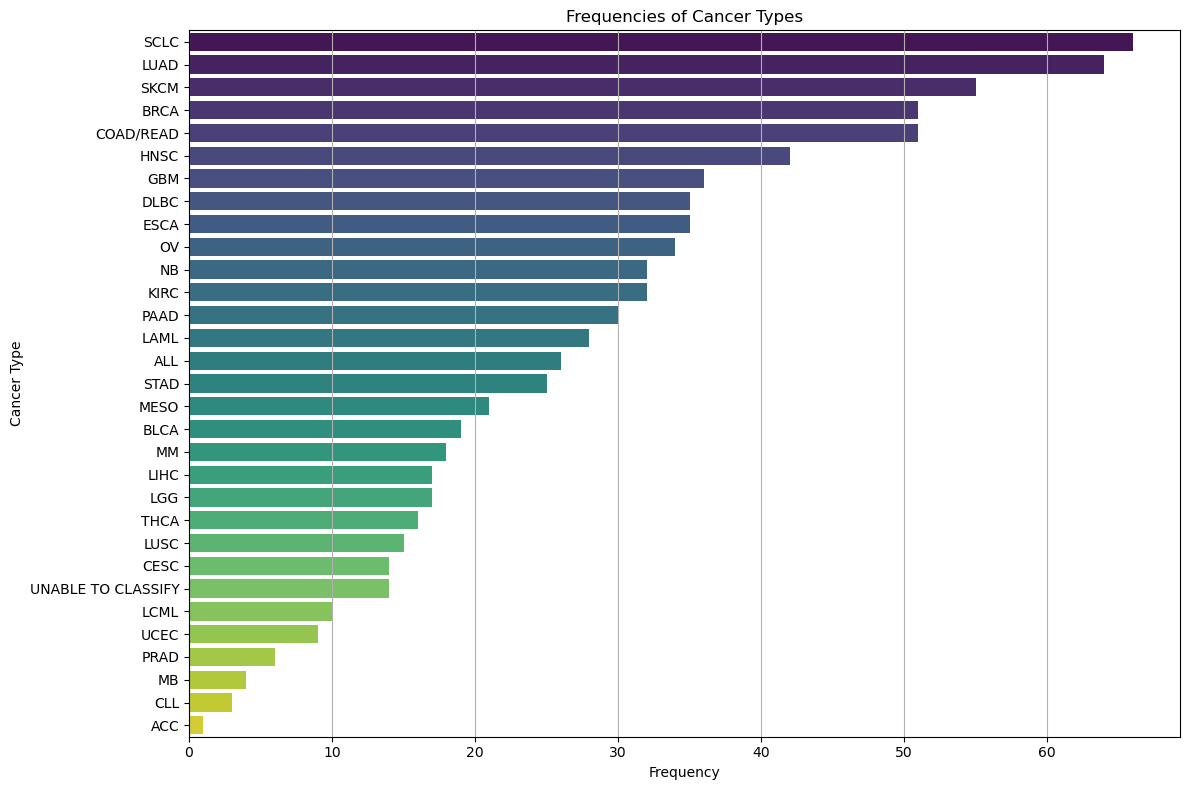

In [3]:
# Create a bar plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x=cancer_type_counts.values, y=cancer_type_counts.index, palette="viridis")
plt.title('Frequencies of Cancer Types')
plt.xlabel('Frequency')
plt.ylabel('Cancer Type')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("Frequencies of Cancer Types")
plt.show()

**1.2 The binary event matrix (BEM) contains mutational and copy number features of the 
cancer cell lines. Visualise the data e.g. the mutational frequencies, oncoprint, etc.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df3 = pd.read_csv(r'C:\Users\Administrator\Melbourne University Assignment jupyter notebook\Coding_Assignment\data\PANCAN_BEM.tsv', sep='\t', index_col=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, ABCB1_mut to loss:cnaPANCAN425
Columns: 254 entries, 1287381 to 907042
dtypes: int64(254)
memory usage: 1.4+ MB


In [5]:
df3.head(5)

,1287381,924100,910924,687561,1287706,687452,906798,906797,906800,905947,...,1290813,1240135,1240136,1240137,1290814,1240138,1240139,1240140,1247873,907042
ABCB1_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABL2_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACACA_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACVR1B_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACVR2A_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Calculate the sum of each row to get the frequency of each mutation
df3["mutation_frequencies"] = df3.sum(axis=1) # axis=1 means summing across columns
df3.head(5)

,1287381,924100,910924,687561,1287706,687452,906798,906797,906800,905947,...,1240135,1240136,1240137,1290814,1240138,1240139,1240140,1247873,907042,mutation_frequencies
ABCB1_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ABL2_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ACACA_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ACVR1B_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ACVR2A_mut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df3_sorted = df3.sort_values("mutation_frequencies", ascending = False) # Sort the dataframe by the mutation frequencies in descending order
TopMutationGene30 = df3_sorted.iloc[0:30,:] # Select the top 30 genes with the highest mutation frequencies
TopMutationGene30

,1287381,924100,910924,687561,1287706,687452,906798,906797,906800,905947,...,1240135,1240136,1240137,1290814,1240138,1240139,1240140,1247873,907042,mutation_frequencies
TP53_mut,1,1,0,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,1,0,165
"loss:cnaPANCAN144 (BNC2,CDKN2A,JAK2,PSIP1)",1,0,0,1,0,0,0,1,0,1,...,1,0,1,1,1,1,1,1,1,155
loss:cnaPANCAN335,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,102
loss:cnaPANCAN334,0,1,1,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,101
loss:cnaPANCAN338,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,99
loss:cnaPANCAN337,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,97
loss:cnaPANCAN336,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,96
loss:cnaPANCAN120,0,0,1,1,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,90
loss:cnaPANCAN340,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,87
"loss:cnaPANCAN210 (FAT1,IRF2)",0,1,0,1,0,0,1,1,0,0,...,1,0,1,1,1,0,0,1,1,85


In [8]:
TopMutationGene30.to_csv("TopMutationGene30.csv", index = True) # Save the top 30 genes with the highest mutation frequencies to a new csv file

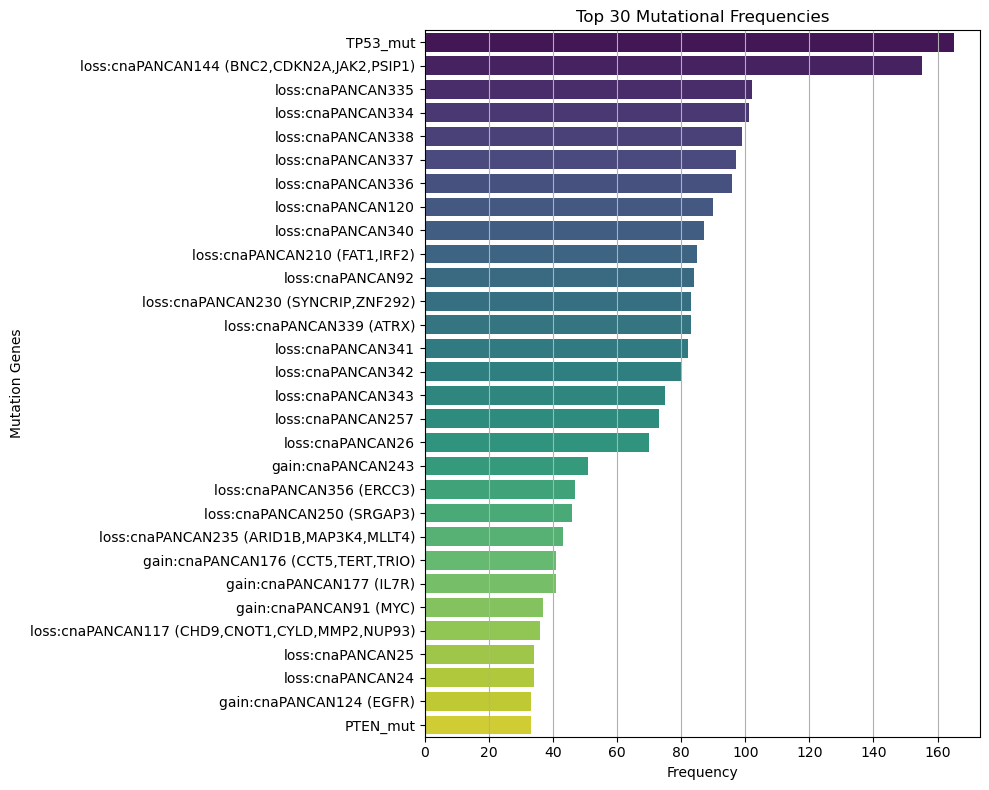

In [9]:
# Create a colormap based on the frequency values
plt.figure(figsize=(10, 8)) # Set the figure size
sns.barplot(x=TopMutationGene30["mutation_frequencies"], y=TopMutationGene30.index, palette="viridis") # Create a bar plot, set the x-axis as the mutation frequencies and the y-axis as the gene names
plt.title('Top 30 Mutational Frequencies') # Set the title of the plot
plt.xlabel('Frequency') # Set the x-axis label
plt.ylabel('Mutation Genes') # Set the y-axis label
plt.grid(axis='x') # Add grid lines to the x-axis
plt.tight_layout() # Adjust the layout of the plot
plt.savefig("Top 30 Mutational Frequencies") # Save the plot as a png file
plt.show() # Display the plot

**1.3 Visualise the distribution of IC50 values for drug A, B, C and D. Describe what you observe. **

In [10]:
import pandas as pd 
df2 = pd.read_csv(r'C:\Users\Administrator\Melbourne University Assignment jupyter notebook\Coding_Assignment\data\Drug_response_log10_IC50.csv')
df2.head()

,COSMIC_ID,Drug_1,Drug_2,Drug_3,Drug_4
0,910944,0.641370,2.049717,-0.035384,0.272438
1,1295741,0.717884,0.864209,0.701970,1.209836
2,910692,1.892087,2.139807,0.851740,0.673990
3,1297439,2.269759,2.303914,1.137956,1.698989
4,906838,1.358368,1.161892,2.060528,1.093045


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COSMIC_ID  990 non-null    int64  
 1   Drug_1     849 non-null    float64
 2   Drug_2     873 non-null    float64
 3   Drug_3     916 non-null    float64
 4   Drug_4     803 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 38.8 KB


In [12]:
df2.isnull().sum()

COSMIC_ID      0
Drug_1       141
Drug_2       117
Drug_3        74
Drug_4       187
dtype: int64

In [13]:
df2_fillna = df2.apply(lambda x: x.fillna(x.mean()), axis=0)
df2_fillna

,COSMIC_ID,Drug_1,Drug_2,Drug_3,Drug_4
0,910944,0.641370,2.049717,-0.035384,0.272438
1,1295741,0.717884,0.864209,0.701970,1.209836
2,910692,1.892087,2.139807,0.851740,0.673990
3,1297439,2.269759,2.303914,1.137956,1.698989
4,906838,1.358368,1.161892,2.060528,1.093045
...,...,...,...,...,...
985,906849,1.528644,1.417426,1.546938,1.149720
986,924189,1.528644,1.417426,1.546938,1.149720
987,949092,1.528644,1.417426,1.546938,1.149720
988,688022,1.528644,1.417426,1.546938,1.149720


In [14]:
df2_fillna.isnull().sum()

COSMIC_ID    0
Drug_1       0
Drug_2       0
Drug_3       0
Drug_4       0
dtype: int64

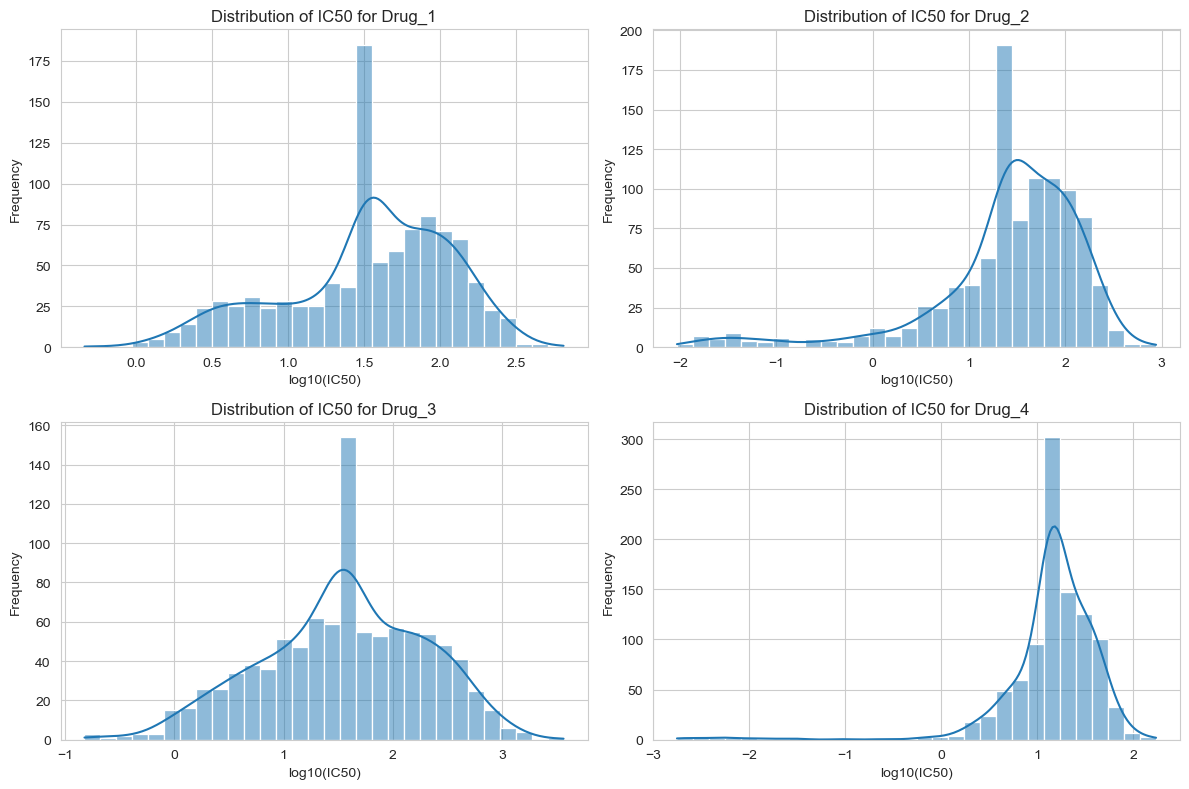

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distributions of IC50 values for each drug
plt.figure(figsize=(12, 8))
for i, column in enumerate(df2.columns[1:], 1): # Iterate through the columns of the dataframe
    plt.subplot(2, 2, i) # Create subplots
    sns.histplot(df2_fillna[column], kde=True, bins=30) # Plot the distribution of IC50 values
    plt.title(f'Distribution of IC50 for {column}') # Set the title of the plot
    plt.xlabel('log10(IC50)') # Set the x-axis label
    plt.ylabel('Frequency') # Set the y-axis label

plt.tight_layout()
plt.show()

In [16]:
# Calculate mean and variance for each drug
mean_values = df2.mean()
variance_values = df2.var()

mean_variance = pd.DataFrame({
    'mean': mean_values,
    'variance': variance_values
})
mean_variance.iloc[1:,:]

,mean,variance
Drug_1,1.528644,0.350680
Drug_2,1.417426,0.717562
Drug_3,1.546938,0.599191
Drug_4,1.149720,0.347727


Filling missing values with means will destroy the distribution of the original data, which is not fit to subsequent training of machine learning models. Therefore, we choose not to fill with mean but draw directly with the original data.

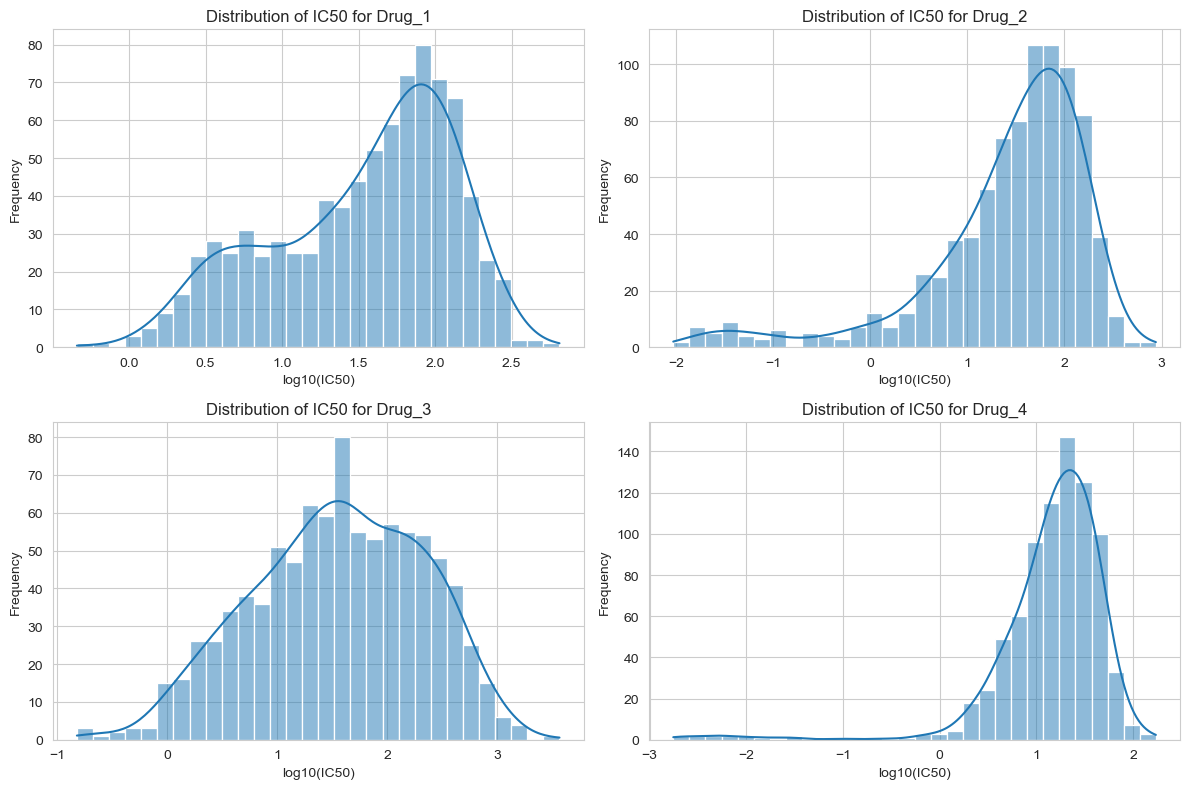

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distributions of IC50 values for each drug
plt.figure(figsize=(12, 8))
for i, column in enumerate(df2.columns[1:],1):
    plt.subplot(2, 2, i)
    sns.histplot(df2[column], kde=True, bins=30)
    plt.title(f'Distribution of IC50 for {column}')
    plt.xlabel('log10(IC50)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Distribution of IC50")
plt.show()

Results Interpretation: The differential threshold settings across various studies necessitate the establishment of IC50 equal to 1 as the threshold in this context. An IC50 exceeding 1 signifies drug resistance, whereas an IC50 below 1 denotes drug sensitivity.

In Figure 1, the data reveal that the IC50 values for most specimens regarding drug 1 are situated between 1 and 2, suggesting moderate resistance to drug 1 in these specimens. Those specimens exhibiting IC50 values ranging from 0.5 to 1.5 are of medium quantity.

Figure 2 illustrates a broader dispersion of IC50 values, extending from -2 to 3, indicating a substantial heterogeneity in the samples' responsiveness to Drug_2. The few samples with values around -2 manifest the utmost sensitivity, whereas the majority display resistance.

In Figure 3, the distribution span is comparatively constrained, with the IC50 values for the bulk of the samples surpassing 1, which implies that a predominant number of samples exhibit resistance to Drug3.

Figure 4 portrays a more focused distribution of IC50 values relative to Drug_1, centering around a peak of 1.2; the outliers suggest that Drug4 is highly effective for a minority of the samples.